In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [27]:
x = np.linspace(-3,3,100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0,1,size = 100)
y = y.reshape(-1,1)
y.shape

(100, 1)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

In [29]:
poly = PolynomialFeatures(degree=2) #为原始数据添加幂数为2的特征
poly.fit(X)
X2 = poly.transform(X)

In [30]:
X2.shape

(100, 3)

In [31]:
X2[:5,:]

array([[ 1.        , -3.        ,  9.        ],
       [ 1.        , -2.93939394,  8.64003673],
       [ 1.        , -2.87878788,  8.28741965],
       [ 1.        , -2.81818182,  7.94214876],
       [ 1.        , -2.75757576,  7.60422406]])

In [32]:
from sklearn.linear_model import LinearRegression

lig_reg = LinearRegression()
lig_reg.fit(X2,y)
y_predict = lig_reg.predict(X2)

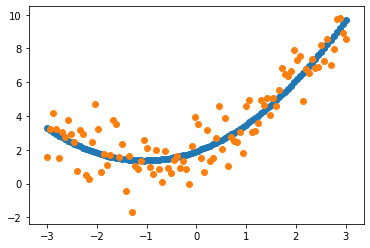

In [33]:
plt.scatter(X,y_predict)
plt.scatter(X,y)

In [10]:
lig_reg.coef_

array([0.        , 0.96283045, 0.54719522])

In [11]:
lig_reg.intercept_

1.6828170159626463

## 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)
X.shape

(5, 2)

In [13]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [15]:
x = np.linspace(-3,3,100)
X = x.reshape(-1, 1)
y = 0.5*x**2 + x + 2 + np.random.normal(0,1,size = 100)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [18]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

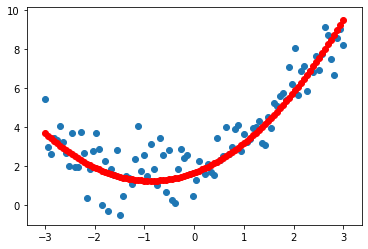

In [19]:
plt.scatter(X,y)
plt.scatter(X,y_predict,color='r')